<a href="https://colab.research.google.com/github/Akataruka/MNIST_dataset_prediction/blob/main/MNIST_dataset_Regularized_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the dependency modules
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#get the shapes of the different train and test samples
print("train images shape: ",train_images.shape)
print("train labels shape: ",test_images.shape)
print("test images shape: ", train_labels.shape)
print("test labels shape: ",test_labels.shape)

train images shape:  (60000, 28, 28)
train labels shape:  (10000, 28, 28)
test images shape:  (60000,)
test labels shape:  (10000,)


In [4]:
# Normalize the data

#Reshape the data to be able effectively distinguish a single image (28*28*1)
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

#The values of BW image is from (0-255) we normalise the value sin teh range (0-1)
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
# Regularized CNN model
regularized_model_2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Assuming input shape of 28x28x1

    # Dense layer with L2 regularization and batch normalization
    layers.Dense(2048, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Dense layer with L2 regularization and batch normalization
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),

    # Dense layer with L2 regularization and batch normalization
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.25),
    # Dense layer with L2 regularization and batch normalization
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.25),

    # Dense layer with L2 regularization and batch normalization
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.25),

    # Dense layer with L2 regularization and batch normalization
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.25),

    # Dense layer with L2 regularization and batch normalization
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.25),

    # Dense layer with L2 regularization and batch normalization
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.25),

    # Output layer
    layers.Dense(10, activation='softmax')  # Using softmax for multi-class classification
])

regularized_model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       1,607,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,414,106 (16.84 MB)

 Trainable params: 4,410,010 (16.82 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [6]:
# Compile the regularized model
regularized_model_2.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [7]:
# Fit the regularized model
regularized_history = regularized_model_2.fit(train_images,train_labels,epochs=100,batch_size=64,validation_data=(test_images,test_labels))

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.5260 - loss: 2.3916 - val_accuracy: 0.9380 - val_loss: 0.7214
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8918 - loss: 0.8329 - val_accuracy: 0.9587 - val_loss: 0.4099
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9239 - loss: 0.5526 - val_accuracy: 0.9637 - val_loss: 0.3263
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9348 - loss: 0.4512 - val_accuracy: 0.9679 - val_loss: 0.2821
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9428 - loss: 0.3979 - val_accuracy: 0.9696 - val_loss: 0.2628
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9425 - loss: 0.3749 - val_accuracy: 0.9705 - val_loss: 0.2522
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9498 - loss: 0.3549 - val_accuracy: 0.9723 - val_loss: 0.2315
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9506 - loss: 0.3324 - val_ac

In [8]:
# Evaluate the regularized model
regularized_loss, regularized_accuracy = regularized_model_2.evaluate(test_images, test_labels)
print("Regularized model - Loss: {:.4f}, Accuracy: {:.4f}".format(regularized_loss, regularized_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9812 - loss: 0.2137
Regularized model - Loss: 0.1786, Accuracy: 0.9847


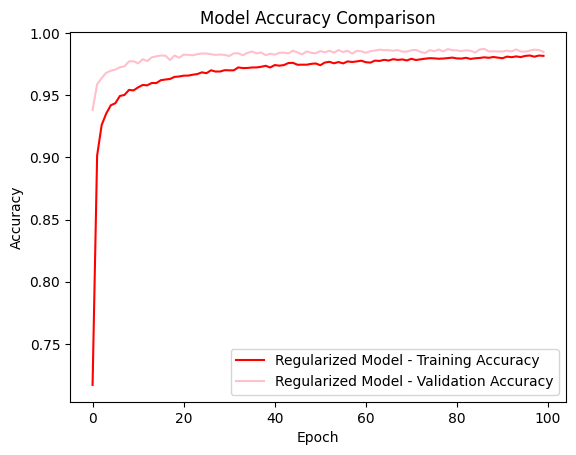

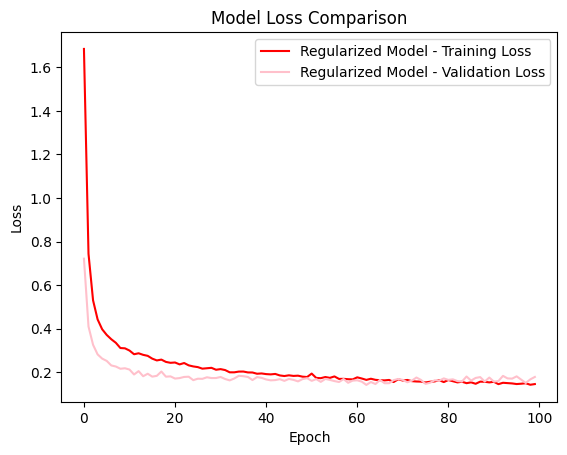

In [9]:
#  Plot training history
# plt.plot(overfit_history.history['accuracy'], label='Overfitting Model - Training Accuracy', color='blue')
# plt.plot(overfit_history.history['val_accuracy'], label='Overfitting Model - Validation Accuracy', color='lightblue')
plt.plot(regularized_history.history['accuracy'], label='Regularized Model - Training Accuracy', color='red')
plt.plot(regularized_history.history['val_accuracy'], label='Regularized Model - Validation Accuracy', color='pink')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# plt.plot(overfit_history.history['loss'], label='Overfitting Model - Training Loss', color='blue')
# plt.plot(overfit_history.history['val_loss'], label='Overfitting Model - Validation Loss', color='lightblue')
plt.plot(regularized_history.history['loss'], label='Regularized Model - Training Loss', color='red')
plt.plot(regularized_history.history['val_loss'], label='Regularized Model - Validation Loss', color='pink')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()